# Data processing

In [2]:
from cc3dtools.PostProcess import PostProcess, SpacePlot
from cc3dtools.GenomeCompare import GenomeCompare

In [3]:
gc = GenomeCompare.from_gen2_file('./simulation_out/eccentric/genomes_Tue_Aug_25_14:41:02_2015.csv.gen2')
pp = PostProcess(end_file='./simulation_out/eccentric/finish_cells_Tue_Aug_25_14:41:02_2015.csv', gc=gc)

In [5]:
import json
import pickle
import random
from cc3dtools.PostProcess import proportion_pairwise_differences, number_of_segregating_sites

In [12]:
method_parameters = {
    "N_points": 20,
    "max_cells":500,
    "radius": 50,
    "min_cells": 20,
    "ecc_steps": 0.1,
    "cell_steps": 5,
    "lattice_size": 1000
}

In [13]:
results = pp.eccentric_sampling_strategy(**method_parameters)

frequency_of_mutations= (2194, 1368, 606, 841)
x= [ 0.1  0.2  0.3  0.5]
y= [ 1.          0.88888889  0.77777778  0.55555556]
individual pis= [ 438.8         486.4         282.8         467.22222222]
frequency_of_mutations= (2194, 1368, 606, 841)
x= [ 0.1  0.2  0.3  0.5]
y= [ 1.          0.88888889  0.77777778  0.55555556]
individual pis= [ 438.8         486.4         282.8         467.22222222]
frequency_of_mutations= (2194, 1368, 606, 841)
x= [ 0.1  0.2  0.3  0.5]
y= [ 1.          0.88888889  0.77777778  0.55555556]
individual pis= [ 438.8         486.4         282.8         467.22222222]
frequency_of_mutations= (1531, 826, 197, 317, 934)
x= [ 0.07142857  0.14285714  0.21428571  0.42857143  0.5       ]
y= [ 1.          0.92307692  0.84615385  0.61538462  0.53846154]
individual pis= [ 218.71428571  217.84615385   71.43956044  167.20879121  502.92307692]
frequency_of_mutations= (1531, 826, 197, 317, 934)
x= [ 0.07142857  0.14285714  0.21428571  0.42857143  0.5       ]
y= [ 1.          0

In [11]:
results

{'results': [{'areas': [{'N': 50,
     'area': 3500.0,
     'subsample_100': {'E_of_pi': 1.3037991880953983,
      'S': 8112.25,
      'd': 46.237027231518574},
     'subsample_50': {'E_of_pi': 1.3037991880953983,
      'S': 8112.25,
      'd': 46.237027231518574}},
    {'N': 100,
     'area': 7000.0000000000018,
     'subsample_100': {'E_of_pi': 1.6620481963189047,
      'S': 10053.6,
      'd': 57.154856427134504},
     'subsample_50': {'E_of_pi': 1.6325452618756167,
      'S': 9885.8500000000004,
      'd': 57.154856427134504}},
    {'N': 200,
     'area': 14000.0,
     'subsample_100': {'E_of_pi': 1.8221645352207325,
      'S': 12020.75,
      'd': 67.21072074420691},
     'subsample_50': {'E_of_pi': 1.8155291385522614,
      'S': 11775.299999999999,
      'd': 67.21072074420691}},
    {'N': 300,
     'area': 21000.0,
     'subsample_100': {'E_of_pi': 1.8851941324030572,
      'S': 13294.299999999999,
      'd': 78.573580071256956},
     'subsample_50': {'E_of_pi': 1.82969025313405

In [14]:
json.dumps(results)

'{"largeA_N": [{"eccentricity": 0.0, "k": [2, 12, 22, 32, 42, 52, 62, 72, 82, 92, 102, 112, 122, 132, 142, 152, 162, 172, 182, 192], "S": [4074.9699999999998, 18174.889999999999, 31412, 41221, 49476, 60414, 67707, 77081, 78880, 88621, 96507, 102324, 113115, 120432, 127740, 128610, 133836, 141967, 141967, 154884]}, {"eccentricity": 0.10000000000000001, "k": [2, 12, 22, 32, 42, 52, 62, 72, 82, 92, 102, 112, 122, 132, 142, 152, 162, 172, 182, 192], "S": [4055.9499999999998, 18162.349999999999, 29978, 42910, 50216, 56086, 62195, 77603, 81738, 91423, 97788, 99357, 106460, 116758, 117964, 131086, 128831, 136967, 142895, 148885]}, {"eccentricity": 0.20000000000000001, "k": [2, 12, 22, 32, 42, 52, 62, 72, 82, 92, 102, 112, 122, 132, 142, 152, 162, 172, 182, 192], "S": [3994.71, 18246.060000000001, 30621, 41341, 49836, 60856, 63303, 76235, 85894, 91655, 94752, 100587, 105201, 112754, 118000, 123073, 133834, 138835, 136569, 150099]}, {"eccentricity": 0.30000000000000004, "k": [2, 12, 22, 32, 42,

In [7]:
from math import log

def H(n):
    """Returns an approximate value of n-th harmonic number.

       http://en.wikipedia.org/wiki/Harmonic_number
    """
    # Euler-Mascheroni constant
    gamma = 0.57721566490153286060651209008240243104215933593992
    return gamma + log(n) + 0.5/n - 1./(12*n**2) + 1./(120*n**4)


In [8]:
sample = pp.cells_in_ellipse_at(500,500,0,[1000,1000],type_restrictions=[1,2,3])
two_samples_ids = [cell.id for cell in random.sample(sample,2)]
analyzed = pp.frequency_analyze(two_samples_ids)
proportion_pairwise_differences(analyzed), number_of_segregating_sites(analyzed), number_of_segregating_sites(analyzed)/ H(3)

frequency_of_mutations= (3374, 1079)
x= [ 0.25  0.5 ]
y= [ 1.          0.66666667]
individual pis= [ 1687.           719.33333333]
frequency_of_mutations= (3374, 1079)
number_of_mutations= (1, 2)
frequency_of_mutations= (3374, 1079)
number_of_mutations= (1, 2)


(2406.333333333333, 3374.0, 1840.3587092527555)

In [9]:
small_sample = pp.cells_in_ellipse_at(500,500,0,[100,100], type_restrictions=[1,2,3])
small_sample_ids = [cell.id for cell in random.sample(small_sample,2)]
small_analyzed = pp.frequency_analyze(small_sample_ids)
proportion_pairwise_differences(small_analyzed), number_of_segregating_sites(small_analyzed), number_of_segregating_sites(small_analyzed)/H(3)

frequency_of_mutations= (1559, 1265)
x= [ 0.25  0.5 ]
y= [ 1.          0.66666667]
individual pis= [ 779.5         843.33333333]
frequency_of_mutations= (1559, 1265)
number_of_mutations= (1, 2)
frequency_of_mutations= (1559, 1265)
number_of_mutations= (1, 2)


(1622.8333333333333, 1559.0, 850.36135972882209)

In [10]:
sample = pp.cells_in_ellipse_at(500,500,0,[1000,1000],type_restrictions=[1,2,3])
two_samples_ids = [cell.id for cell in random.sample(sample,1)]
analyzed = pp.frequency_analyze(two_samples_ids)
proportion_pairwise_differences(analyzed), number_of_segregating_sites(analyzed), number_of_segregating_sites(analyzed)/ H(3)

frequency_of_mutations= (1245,)
x= [ 0.5]
y= [ 1.]
individual pis= [ 1245.]
frequency_of_mutations= (1245,)
number_of_mutations= (1,)
frequency_of_mutations= (1245,)
number_of_mutations= (1,)


(1245.0, 0.0, 0.0)

In [27]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [28]:
frequency_results , number_of_cells = analyzed

if len( frequency_results ):
    # 
    number_of_mutations, frequency_of_mutations = zip( *frequency_results.items() )
    print 'frequency_of_mutations=',frequency_of_mutations
    number_of_mutations = np.array(number_of_mutations)  
    print number_of_mutations
    # multiply by 2 to account for diploidy

    S = np.sum( np.ones( len(number_of_mutations) - 1 ) * np.array(frequency_of_mutations[:-1]) ) 


frequency_of_mutations= (3390, 106)
[1 2]


In [29]:
S

3390.0

In [7]:
len(pp.frequency_analyze(two_samples_ids, return_loci=True).keys())

3638

In [28]:
number_of_segregating_sites(analyzed)

x= [1 2]


2.0

In [11]:
analyzed[1]

2

In [21]:
sample2 = pp.cells_in_ellipse_at(500, 500, 0 , [1000,1000], type_restrictions=[1,2,3])
sub = random.sample(sample2, 3)
sub_ids_only = [ cell.id for cell in sub ]
analyzed2 = pp.frequency_analyze(sub_ids_only)

In [22]:
proportion_pairwise_differences(analyzed2)

_= (3338, 206, 1079)
x= [ 0.33333333  0.66666667  1.        ]


0.88888888888888895

In [8]:
number_of_segregating_sites(analyzed2)

NameError: name 'analyzed2' is not defined

---------
# OLD RESULTS

# Raw Results

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### MPL Log-log of E(pi) vs N

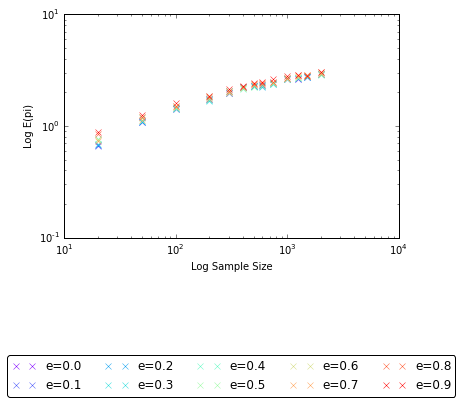

In [8]:
plt.figure()

color = plt.cm.rainbow(np.linspace(0,1,len(results)))

for i, result in enumerate(results):
    ecc = result['eccentricity']   
    x = []
    y = []
#     labels.append('e='+str(ecc))

    for sample in result['samples']:
        x.append(sample['sample_size'])
        y.append(sample['E_of_pi'])

    plt.plot(x, y, 'x', color=color[i], label='e='+str(ecc), ms=6)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), fancybox=True, ncol=5)
#         print sample['sample_size'], sample['E_of_pi']

ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

plt.xlabel('Log Sample Size')
plt.ylabel('Log E(pi)')
plt.show()

### Log-log of E(pi) vs N

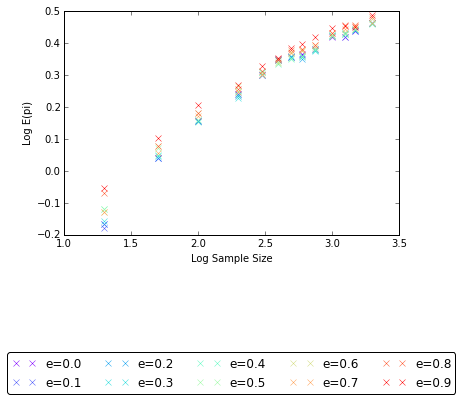

In [14]:
plt.figure()

color = plt.cm.rainbow(np.linspace(0,1,len(results)))

for i, result in enumerate(results):
    ecc = result['eccentricity']   
    x = []
    y = []
#     labels.append('e='+str(ecc))

    for sample in result['samples']:
        x.append(np.log10(sample['sample_size']))
        y.append(np.log10(sample['E_of_pi']))

    plt.plot(x, y, 'x', color=color[i], label='e='+str(ecc), ms=6)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), fancybox=True, ncol=5)
#         print sample['sample_size'], sample['E_of_pi']

ax = plt.gca()


plt.xlabel('Log Sample Size')
plt.ylabel('Log E(pi)')
plt.show()

### MPL log-log of S vs N

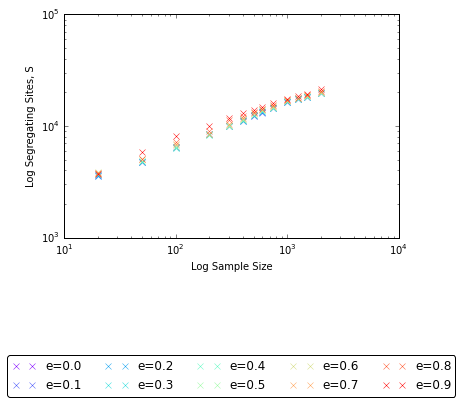

In [13]:
plt.figure()

color = plt.cm.rainbow(np.linspace(0,1,len(results)))

for i, result in enumerate(results):
    ecc = result['eccentricity']   
    x = []
    y = []
#     labels.append('e='+str(ecc))

    for sample in result['samples']:
        x.append(sample['sample_size'])
        y.append(sample['S'])

    plt.plot(x, y, 'x', color=color[i], label='e='+str(ecc), ms=6)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), fancybox=True, ncol=5)
#         print sample['sample_size'], sample['E_of_pi']

ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

plt.xlabel('Log Sample Size')
plt.ylabel('Log Segregating Sites, S')
plt.show()

### Log-Log of S vs N

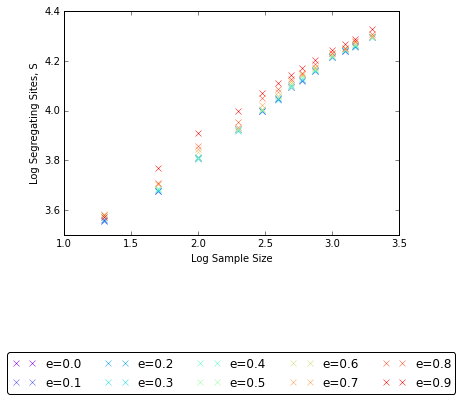

In [10]:
plt.figure()

color = plt.cm.rainbow(np.linspace(0,1,len(results)))

for i, result in enumerate(results):
    ecc = result['eccentricity']   
    x = []
    y = []
#     labels.append('e='+str(ecc))

    for sample in result['samples']:
        x.append(np.log10(sample['sample_size']))
        y.append(np.log10(sample['S']))

    plt.plot(x, y, 'x', color=color[i], label='e='+str(ecc), ms=6)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), fancybox=True, ncol=5)
#         print sample['sample_size'], sample['E_of_pi']


plt.xlabel('Log Sample Size')
plt.ylabel('Log Segregating Sites, S')
plt.show()

### E(pi) vs N

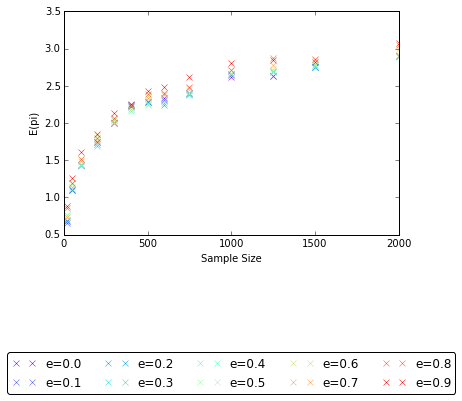

In [11]:
plt.figure()

color = plt.cm.rainbow(np.linspace(0,1,len(results)))

for i, result in enumerate(results):
    ecc = result['eccentricity']   
    x = []
    y = []
#     labels.append('e='+str(ecc))

    for sample in result['samples']:
        x.append(sample['sample_size'])
        y.append(sample['E_of_pi'])

    plt.plot(x, y, 'x', color=color[i], label='e='+str(ecc), ms=6)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), fancybox=True, ncol=5)
#         print sample['sample_size'], sample['E_of_pi']

ax = plt.gca()


plt.xlabel('Sample Size')
plt.ylabel('E(pi)')
plt.show()

### S vs N

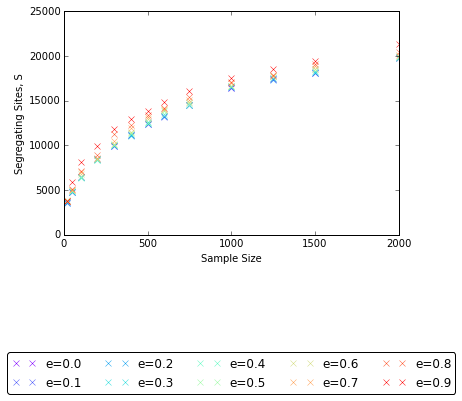

In [12]:
plt.figure()

color = plt.cm.rainbow(np.linspace(0,1,len(results)))

for i, result in enumerate(results):
    ecc = result['eccentricity']   
    x = []
    y = []
#     labels.append('e='+str(ecc))

    for sample in result['samples']:
        x.append(sample['sample_size'])
        y.append(sample['S'])

    plt.plot(x, y, 'x', color=color[i], label='e='+str(ecc), ms=6)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), fancybox=True, ncol=5)
#         print sample['sample_size'], sample['E_of_pi']


plt.xlabel('Sample Size')
plt.ylabel('Segregating Sites, S')
plt.show()

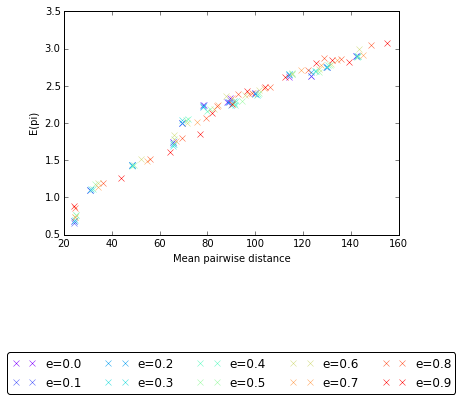

In [15]:
plt.figure()

color = plt.cm.rainbow(np.linspace(0,1,len(results)))

for i, result in enumerate(results):
    ecc = result['eccentricity']   
    x = []
    y = []
#     labels.append('e='+str(ecc))

    for sample in result['samples']:
        x.append(sample['d_0'])
        y.append(sample['E_of_pi'])

    plt.plot(x, y, 'x', color=color[i], label='e='+str(ecc), ms=6)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), fancybox=True, ncol=5)
#         print sample['sample_size'], sample['E_of_pi']

ax = plt.gca()


plt.xlabel('Mean pairwise distance')
plt.ylabel('E(pi)')
plt.show()

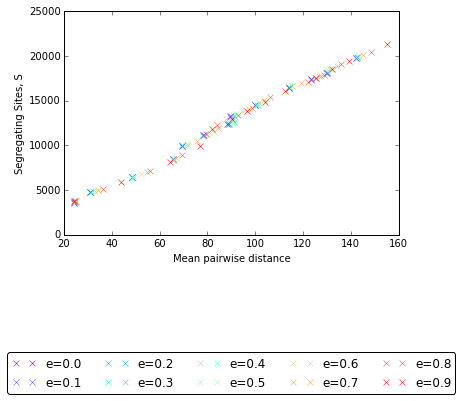

In [16]:
plt.figure()

color = plt.cm.rainbow(np.linspace(0,1,len(results)))

for i, result in enumerate(results):
    ecc = result['eccentricity']   
    x = []
    y = []
#     labels.append('e='+str(ecc))

    for sample in result['samples']:
        x.append(sample['d_0'])
        y.append(sample['S'])

    plt.plot(x, y, 'x', color=color[i], label='e='+str(ecc), ms=6)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), fancybox=True, ncol=5)
#         print sample['sample_size'], sample['E_of_pi']

ax = plt.gca()


plt.xlabel('Mean pairwise distance')
plt.ylabel('Segregating Sites, S')
plt.show()

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from cc3dtools.PostProcess import distance_between_cells, mean_distances_between_cells
from cc3dtools.Cell import Cell

In [3]:
cells = []
for i in range(1000):
    cells.append( Cell(i, *np.random.random(size=3)*1000) )
    

In [13]:
mean_distances_between_cells(cells, subsample_size=1000)

673.14031523887434

[Cell(id=329, x=598.36765537537076, y=436.65862627711147, z=46.642901274889347, type=0, initial=0),
 Cell(id=693, x=463.8500350407453, y=582.94834132023027, z=713.33502684417101, type=0, initial=0),
 Cell(id=354, x=472.30114691090586, y=325.27564376071695, z=892.95157556352422, type=0, initial=0),
 Cell(id=412, x=342.31787594628139, y=978.52682180865736, z=760.7883434717096, type=0, initial=0)]

In [27]:
np.isnan(results[0]['samples'][0]['d_0'])

True